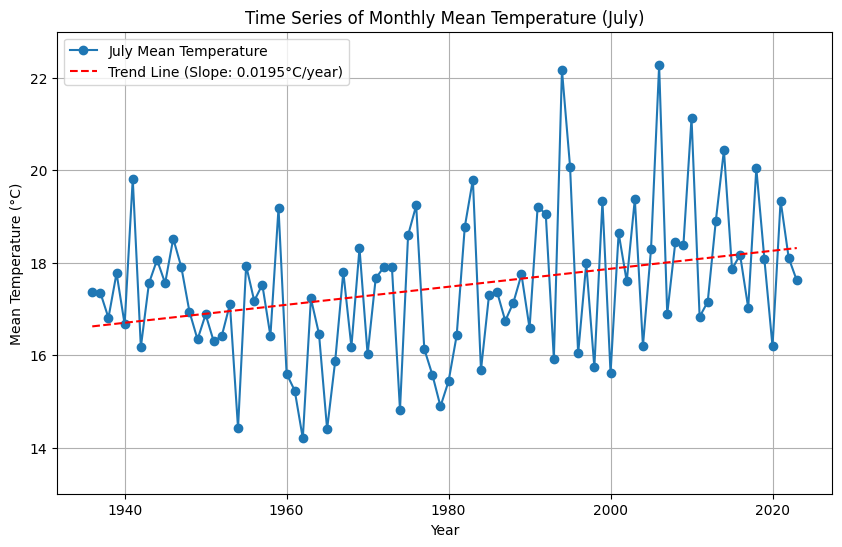

Slope of the trend line: 0.0195 °C/year


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part a: Read the data and process it
file_path = "./../data//interim//klima_hamburg_TMK_TXK_TNK.csv"
data = pd.read_csv(file_path, delimiter=";")

data["DD"] = data["DD"].astype(int)
data["MM"] = data["MM"].astype(int)
data["YYYY"] = data["YYYY"].astype(int)

data["DATE"] = pd.to_datetime(
    {"year": data["YYYY"], "month": data["MM"], "day": data["DD"]}
)
data.set_index("DATE", inplace=True)

# Choose a month (e.g., July) and calculate monthly mean values
chosen_month = 7
monthly_mean = data[data["MM"] == chosen_month].groupby(data["YYYY"])["TMK"].mean()

# Plot the time series of monthly mean values
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_mean.index, monthly_mean.values, marker="o", label="July Mean Temperature"
)

# Add a linear trend line
x = monthly_mean.index.values
y = monthly_mean.values
coefficients = np.polyfit(x, y, 1)
trend_line = np.polyval(coefficients, x)
plt.plot(x, trend_line, 'r--', label=f'Trend Line (Slope: {coefficients[0]:.4f}°C/year)')

plt.title("Time Series of Monthly Mean Temperature (July)")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.ylim(13, 23)  # Set y-axis limits between 10 and 25°C
plt.grid()
plt.legend()
plt.show()

print("Slope of the trend line:", np.round(coefficients[0],4), "°C/year")


## 3.1 b)

In a mathematical sense, a linear trend refers to a straight line that best represents the relationship between variables in a given dataset. This line is determined by minimizing the residuals—the differences between the actual data points and the values predicted by the line. The most common method used is the least squares method, which finds the line that minimizes the sum of the squared residuals. This results in the line that provides the best possible linear approximation of the data.

## 3.1 c)

The trend is not constant over time; it depends significantly on the specific time period chosen for evaluation. For example, when the trend is calculated over the first third of the dataset, the slope of the trend line is negative at -0.055 °C per year. In contrast, during the second third, the slope becomes positive at 0.04 °C per year, while in the final third, the trend slightly declines again with a slope of -0.01 °C per year. This demonstrates that the choice of time period can greatly influence the observed trend and must be considered carefully in any analysis. 

## 3.1 d)

When compared to the global warming trend, the long-term increase of 0.0195 °C per year—equivalent to 0.195 °C per decade—falls at the upper end of the average global warming range, which is approximately 0.15 to 0.2 °C per decade. Although this may seem like a modest increase at first glance, it represents a significant warming of the atmosphere when viewed in the context of historical climate patterns.

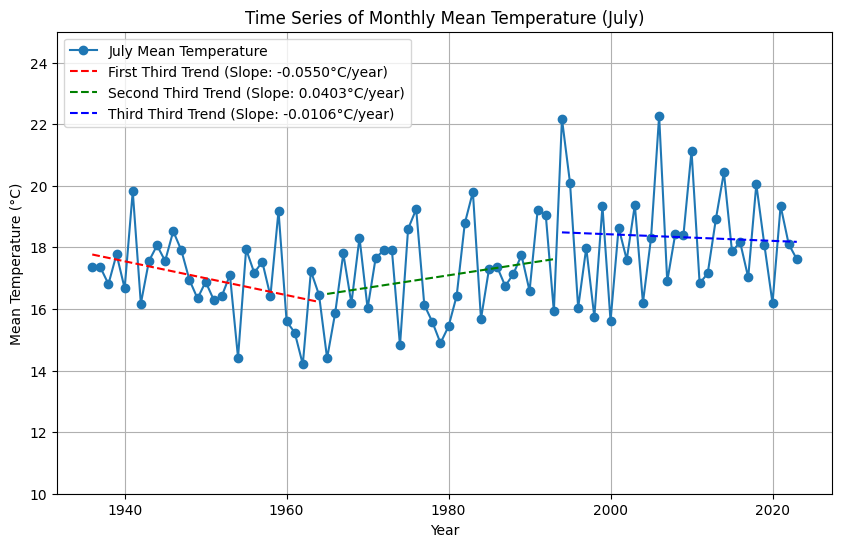

In [ ]:
# Plot the time series of monthly mean values
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_mean.index, monthly_mean.values, marker="o", label="July Mean Temperature"
)

# Add linear trend lines for three different time periods
x = monthly_mean.index.values
y = monthly_mean.values

# Calculate indices for splitting the data into thirds
n = len(x)
first_third_end = n // 3
second_third_end = 2 * n // 3

# First third of the data
coefficients1 = np.polyfit(x[:first_third_end], y[:first_third_end], 1)
trend_line1 = np.polyval(coefficients1, x)
plt.plot(x[:first_third_end], trend_line1[:first_third_end], 'r--', 
         label=f'First Third Trend (Slope: {coefficients1[0]:.4f}°C/year)')

# Second third of the data
coefficients2 = np.polyfit(x[first_third_end:second_third_end], y[first_third_end:second_third_end], 1)
trend_line2 = np.polyval(coefficients2, x[first_third_end:second_third_end])
plt.plot(x[first_third_end:second_third_end], trend_line2, 'g--', 
         label=f'Second Third Trend (Slope: {coefficients2[0]:.4f}°C/year)')

# Third third of the data
coefficients3 = np.polyfit(x[second_third_end:], y[second_third_end:], 1)
trend_line3 = np.polyval(coefficients3, x[second_third_end:])
plt.plot(x[second_third_end:], trend_line3, 'b--', 
         label=f'Third Third Trend (Slope: {coefficients3[0]:.4f}°C/year)')

plt.title("Time Series of Monthly Mean Temperature (July)")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.ylim(10, 25)  # Set y-axis limits between 10 and 25°C
plt.grid()
plt.legend()
plt.show()
